In [1]:
%%bash
pip install cartopy > /dev/null
pip install xarray > /dev/null

# Chapter 7.4 - Raster Data Analysis

In earlier chapters, you learned about how primitive data types can be stored in collections like a `list`. You then learned about how you can access specific items in those collections using indexing. Next, we learned about `numpy` and the analyses that package can unlock in the Geosciences. However, `numpy` alone can be limiting for large, unwieldy datasets that are common in the Geosciences. For that use case, we can turn to a package called `xarray`.


### Chapter 7.4.1 - Raster Data

As we discussed earlier in this chapter, raster data are a type of geographic data that describe and/or summarize regions of space. This is done by defining a regularly-spaced grid of points and associating each point with a value. The space between the points is then implicitly described by the value associated with that point.

For example, consider a very simple representation of raster points below. Notice how they are equally spaced. If we drew lines that intersected positions exactly halfway between the raster points, the resulting boxes can be called grid cells or pixels. Increasing "resolution" is simply making these points closer together.



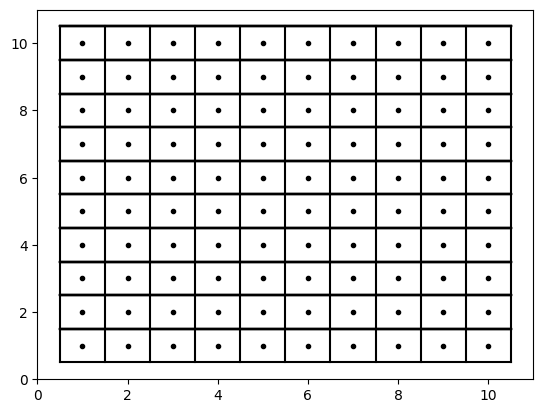

In [2]:
import numpy as np
import matplotlib.pyplot as plt

for xp in np.arange(1, 11, 1):
  for yp in np.arange(1, 11, 1):
      plt.plot(xp, yp, 'k.')
      plt.plot([0.5, 10.5], [yp+.5, yp+.5], 'k-')

  plt.plot([xp+.5, xp+.5], [0.5, 10.5], 'k-')

plt.plot([0.5, 0.5], [0.5, 10.5], 'k-')
plt.plot([0.5, 10.5], [0.5, 0.5], 'k-')


**Your Turn**: Increase the resolution from 1 unit to 0.5 units over the same domain (x range 1 - 10; y range 1 - 10)

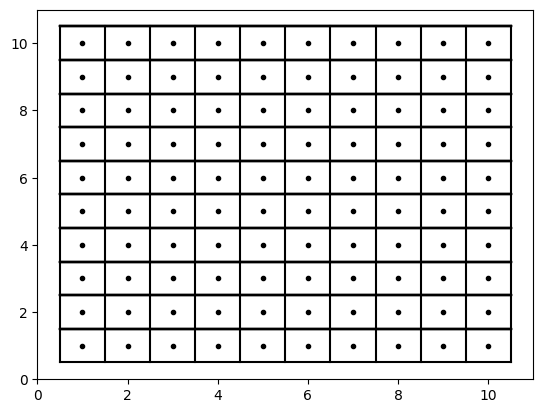

In [3]:
import numpy as np
import matplotlib.pyplot as plt

for xp in np.arange(1, 11, 1):
  for yp in np.arange(1, 11, 1):
      plt.plot(xp, yp, 'k.')
      plt.plot([0.5, 10.5], [yp+.5, yp+.5], 'k-')

  plt.plot([xp+.5, xp+.5], [0.5, 10.5], 'k-')

plt.plot([0.5, 0.5], [0.5, 10.5], 'k-')
plt.plot([0.5, 10.5], [0.5, 0.5], 'k-')

The 2-dimensional `numpy` array that we learned about in earlier chapters was your first interaction with a "raster" data type.

For example, we can create a random 2D `numpy` array and plot the values using `matplotlib`. The positions of each pixel correspond to the value at that index. For example, `r[0, 0]` (first row, first column) is equal to 6 (assuming `np.random.seed(26)`, which is given a color that matches 6 on the colorbar.

**Your turn**: If the pixel color is too dark to read the text, use `color='white'`.

NOTE: if you change `np.random.seed(26)` you will get different numbers.

The value at r[0,0] is -> 6
The array values are ->
 [[6 7 1 2 7]
 [4 1 5 3 2]
 [8 4 6 5 9]
 [6 8 7 9 3]
 [6 1 3 4 4]]


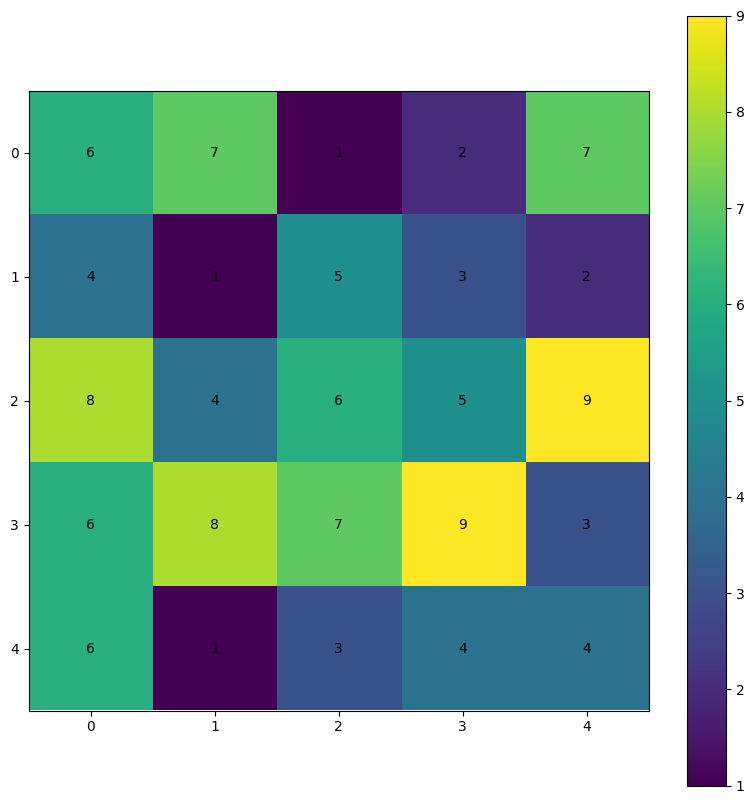

In [4]:
plt.rcParams['figure.figsize'] = 10, 10

np.random.seed(26)

r = np.random.randint(1, 10, size=(5, 5))

ax = plt.subplot(1, 1, 1)

cm = plt.imshow(r)
plt.colorbar(cm, ax=ax)

print("The value at r[0,0] is ->", r[0,0])
print("The array values are ->\n", r)

for i in range(r.shape[0]):
    for j in range(r.shape[1]):
        ax.text(j, i, f"{r[i, j]}", ha="center",
                va="center", color="black")

Using numpy for small datasets with one "variable" like above. However, consider a situation where you have to deal with multiple variables or multiple times of the same (or multiple) variables and incorporate a third, forth, or fifth dimension to separate the variables:

The value at r[var][0,0] is -> 6
The array values are ->
 [[6 7 1 2 7]
 [4 1 5 3 2]
 [8 4 6 5 9]
 [6 8 7 9 3]
 [6 1 3 4 4]]
The value at r[var][0,0] is -> 4
The array values are ->
 [[4 4 2 2 5]
 [1 7 9 1 1]
 [8 7 5 8 1]
 [9 7 4 7 7]
 [1 9 6 9 7]]
The value at r[var][0,0] is -> 2
The array values are ->
 [[2 4 7 1 7]
 [8 1 4 7 7]
 [7 8 2 3 1]
 [7 9 8 4 1]
 [1 7 5 1 4]]


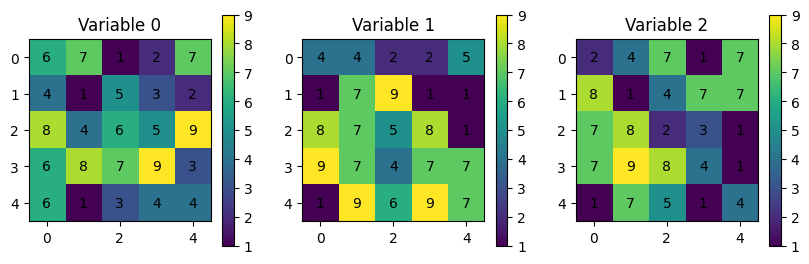

In [5]:
np.random.seed(26)

r = np.random.randint(1, 10, size=(3, 5, 5))

for var in range(r.shape[0]):
    ax = plt.subplot(1, 3, var+1)
    ax.set_title(f"Variable {var}")

    cm = plt.imshow(r[var])
    plt.colorbar(cm, ax=ax, shrink=0.3)

    print("The value at r[var][0,0] is ->", r[var][0,0])
    print("The array values are ->\n", r[var])

    for i in range(r[var].shape[0]):
        for j in range(r[var].shape[1]):
            ax.text(j, i, f"{r[var][i, j]}", ha="center",
                    va="center", color="black")

You might consider a `dictionary` to deal with each variable or time:

The value at var_data[0,0] is -> 6
The array values are ->
 [[6 7 1 2 7]
 [4 1 5 3 2]
 [8 4 6 5 9]
 [6 8 7 9 3]
 [6 1 3 4 4]]
The value at var_data[0,0] is -> 4
The array values are ->
 [[4 4 2 2 5]
 [1 7 9 1 1]
 [8 7 5 8 1]
 [9 7 4 7 7]
 [1 9 6 9 7]]
The value at var_data[0,0] is -> 2
The array values are ->
 [[2 4 7 1 7]
 [8 1 4 7 7]
 [7 8 2 3 1]
 [7 9 8 4 1]
 [1 7 5 1 4]]


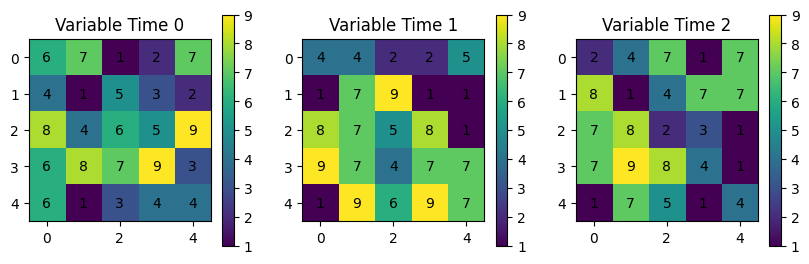

In [6]:
np.random.seed(26)

r = np.random.randint(1, 10, size=(3, 5, 5))

dataset = {'Time 0': r[0],
           'Time 1': r[1],
           'Time 2': r[2]}

for ix, (var_name, var_data) in enumerate(dataset.items()):
    ax = plt.subplot(1, 3, ix+1)
    ax.set_title(f"Variable {var_name}")

    cm = plt.imshow(var_data)
    plt.colorbar(cm, ax=ax, shrink=0.3)

    print("The value at var_data[0,0] is ->", var_data[0,0])
    print("The array values are ->\n", var_data)

    for i in range(var_data.shape[0]):
        for j in range(var_data.shape[1]):
            ax.text(j, i, f"{var_data[i, j]}", ha="center",
                    va="center", color="black")

What if you wanted to find the mean of those three variables?

**Your Turn**: format the `mean` result so the numbers have 1 decimal place.

The value at var_data[0,0] 0 is -> 6
The array 0 values are ->
 [[6 7 1 2 7]
 [4 1 5 3 2]
 [8 4 6 5 9]
 [6 8 7 9 3]
 [6 1 3 4 4]]
The value at var_data[0,0] 1 is -> 4
The array 1 values are ->
 [[4 4 2 2 5]
 [1 7 9 1 1]
 [8 7 5 8 1]
 [9 7 4 7 7]
 [1 9 6 9 7]]
The value at var_data[0,0] 2 is -> 2
The array 2 values are ->
 [[2 4 7 1 7]
 [8 1 4 7 7]
 [7 8 2 3 1]
 [7 9 8 4 1]
 [1 7 5 1 4]]
The value at mean_stack[0,0] is -> 4.0
The array mean_stack are ->
 [[4.         5.         3.33333333 1.66666667 6.33333333]
 [4.33333333 3.         6.         3.66666667 3.33333333]
 [7.66666667 6.33333333 4.33333333 5.33333333 3.66666667]
 [7.33333333 8.         6.33333333 6.66666667 3.66666667]
 [2.66666667 5.66666667 4.66666667 4.66666667 5.        ]]


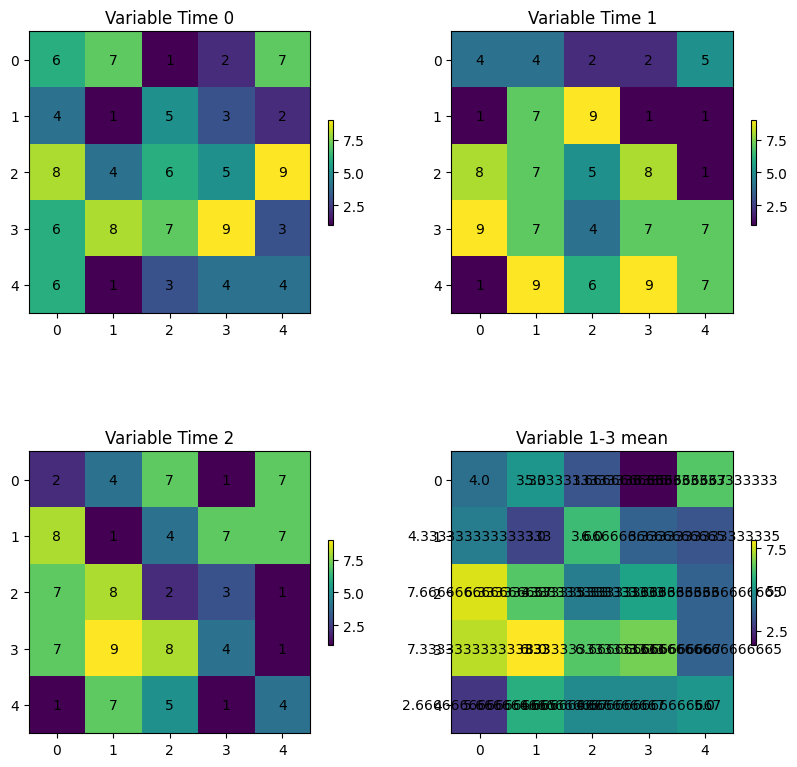

In [7]:
np.random.seed(26)

r = np.random.randint(1, 10, size=(3, 5, 5))

dataset = {'Time 0': r[0],
           'Time 1': r[1],
           'Time 2': r[2]}

times = []

for ix, (var_name, var_data) in enumerate(dataset.items()):
    ax = plt.subplot(2, 2, ix+1)
    ax.set_title(f"Variable {var_name}")

    cm = plt.imshow(var_data)
    plt.colorbar(cm, ax=ax, shrink=0.3)

    print(f"The value at var_data[0,0] {ix} is ->", var_data[0,0])
    print(f"The array {ix} values are ->\n", var_data)

    for i in range(var_data.shape[0]):
        for j in range(var_data.shape[1]):
            ax.text(j, i, f"{var_data[i, j]}", ha="center",
                    va="center", color="black")

    times.append(var_data)

mean_stack = np.stack(times)
mean_stack = np.mean(mean_stack, axis=0) # 'time' dimension mean

ax = plt.subplot(2, 2, 4)
ax.set_title(f"Variable 1-3 mean")

cm = plt.imshow(mean_stack)
plt.colorbar(cm, ax=ax, shrink=0.3)

print("The value at mean_stack[0,0] is ->", mean_stack[0,0])
print("The array mean_stack are ->\n", mean_stack)

for i in range(mean_stack.shape[0]):
    for j in range(mean_stack.shape[1]):
        ax.text(j, i, f"{mean_stack[i, j]}", ha="center",
                va="center", color="black")

As you can see, it is very difficult to keep track of all of the data and perform meaningful analyses on these data. In addition, this does not even take into account *reading in* existing data.


### Chapter 7.4.2 - Xarray

Xarray is a Python package that can handle this issue and [many more](https://docs.xarray.dev/en/stable/examples/visualization_gallery.html). It builds on the `numpy` model of fast, element-wise calculations and the "human readable" positives of `pandas` and `dictionary` to create an all-in-one data inspection, visualization, analysis, and [serialization tool](https://en.wikipedia.org/wiki/Serialization).

The Xarray data model is based on [a few new data structures and terms](https://docs.xarray.dev/en/stable/user-guide/terminology.html) we need to become familiar with:

1. `Dataset`: The main data structure used in xarray. In pandas/geopandas terms, this is the equivalent of a `DataFrame` or `GeoDataFrame`. This contains all of the attribute data, geospatial data, and metadata. Consider the following code that reads in data:

> ```# ds (Dataset) is equivalent to df (DataFrame) in pandas```
>
> ```ds = xarray.open_dataset("filename.nc")```
>
> ```df = pd.read_csv("filename.csv")```


2. `DataArray`: The single-variable data structure. In pandas/geopandas it is equivalent to a `Series`/`GeoSeries`. These data have the following properties:

> - `.values`: converts the `DataArray` variable to a `numpy`-like representation
> - `.dims`: gives the relevant dimension names for that variable
> - `.coords`: accesses the coordinates relevant for that variable
> - `.attrs`: accesses the metadata relevant for that variable


3. `Dimensions`: Dimensions are similar to indexes in numpy arrays, particularly n-dimensional numpy arrays.

4. `Coordinates`: These define human-readable (usually) labels for dimension indexes. Coordinates include specific times, latitudes, longitudes, etc.

5. `Data variables`: The actual Geoscience data at geographic positions defined by the coordinates. In this case, the dimensions of our Geoscience data are (time, lat, and lon). This is telling us that we could access precipitation data by indexing lat, lon, and/or time.

6. `Attributes`: These are the “metadata” associated with the raw values and coordinates that give us more information about the data. This is a very convenient feature of netCDF data and is usually “packaged” with the data seamlessly.

**Data selection**

There are two different ways to index data in the xarray dataset.

1. `.sel(coordinate_name= ...)`: This requires selecting by the coordinate label. More similar to how data are accessed in pandas. If using float data, you need to include the argument method='nearest' because of floating point rounding and precision issues.

2. `.isel(coordinate_name= ...)`: This requires selecting by the integer index. More similar to how data are accessed in numpy.

We can see all of these when reading in a sample file from the `xr.tutorial` subpackage

In [8]:
import xarray as xr

ds = xr.tutorial.open_dataset("air_temperature_gradient")

print("Dataset ->")
display(ds)

print("Dataset sel(time='2013-01-01 00:00:00') ->")
display(ds.sel(time='2013-01-01 00:00:00'))

print("Dataset isel(time=0) ->")
display(ds.isel(time=0))

print("\n\nDataArray ->")
display(ds['Tair'])

print("\n\nDataArray values (only the first five in each dim) ->")
display(ds['Tair'].values[:5, :5, :5])

print("\n\nDataArray dims  ->")
display(ds['Tair'].dims)

print("\n\nDataArray coords  ->")
display(ds['Tair'].coords)

print("\n\nDataArray attrs  ->")
display(ds['Tair'].attrs)

Dataset ->


<xarray.Dataset> Size: 62MB
Dimensions:  (time: 2920, lat: 25, lon: 53)
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    Tair     (time, lat, lon) float64 31MB ...
    dTdx     (time, lat, lon) float32 15MB ...
    dTdy     (time, lat, lon) float32 15MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Dataset sel(time='2013-01-01 00:00:00') ->


<xarray.Dataset> Size: 22kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01
Data variables:
    Tair     (lat, lon) float64 11kB ...
    dTdx     (lat, lon) float32 5kB ...
    dTdy     (lat, lon) float32 5kB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

Dataset isel(time=0) ->


<xarray.Dataset> Size: 22kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01
Data variables:
    Tair     (lat, lon) float64 11kB ...
    dTdx     (lat, lon) float32 5kB ...
    dTdy     (lat, lon) float32 5kB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...



DataArray ->


<xarray.DataArray 'Tair' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]



DataArray values (only the first five in each dim) ->


array([[[241.2 , 242.5 , 243.5 , 244.  , 244.1 ],
        [243.8 , 244.5 , 244.7 , 244.2 , 243.39],
        [250.  , 249.8 , 248.89, 247.5 , 246.  ],
        [266.5 , 267.1 , 267.1 , 266.7 , 265.9 ],
        [274.5 , 274.29, 274.1 , 274.  , 273.79]],

       [[242.1 , 242.7 , 243.1 , 243.39, 243.6 ],
        [243.6 , 244.1 , 244.2 , 244.1 , 243.7 ],
        [253.2 , 252.89, 252.1 , 250.8 , 249.3 ],
        [269.7 , 269.4 , 268.6 , 267.4 , 266.  ],
        [272.5 , 271.5 , 270.4 , 269.4 , 268.5 ]],

       [[242.3 , 242.2 , 242.3 , 242.5 , 242.89],
        [244.6 , 244.39, 244.  , 243.39, 242.8 ],
        [256.2 , 255.5 , 254.2 , 252.3 , 250.2 ],
        [269.29, 268.5 , 267.  , 265.  , 262.7 ],
        [271.9 , 271.79, 271.6 , 270.7 , 269.4 ]],

       [[241.89, 241.8 , 241.8 , 242.1 , 242.6 ],
        [246.3 , 245.3 , 244.2 , 243.3 , 242.6 ],
        [256.6 , 254.7 , 252.1 , 249.39, 247.  ],
        [267.7 , 266.29, 264.4 , 262.2 , 259.79],
        [272.79, 272.4 , 271.9 , 271.4 , 270



DataArray dims  ->


('time', 'lat', 'lon')



DataArray coords  ->


Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0



DataArray attrs  ->


{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': np.int16(2),
 'GRIB_id': np.int16(11),
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

We can quickly examine the raw data from a `DataArray` on a map using `xarray`'s built-in plotting methods:

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


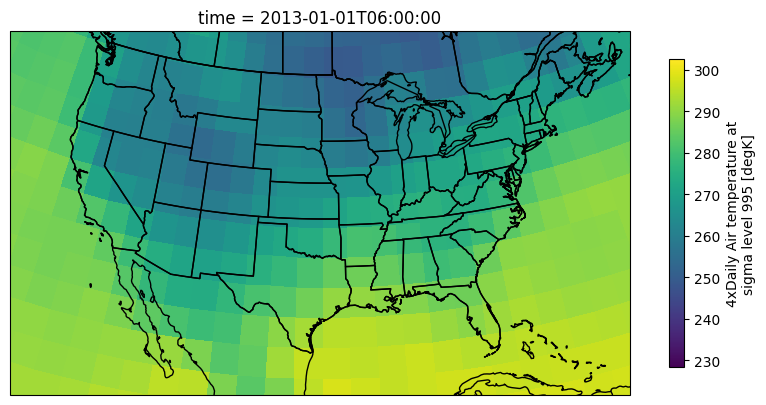

In [9]:
import cartopy.feature as cfeature
import cartopy.crs as ccrs

ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

ax.set_extent([-123, -70, 20, 50])

air = ds['Tair'].isel(time=1)

air.plot(transform=ccrs.PlateCarree(),
         cbar_kwargs={'shrink': 0.4},
         ax=ax)

### Chapter 7.4.3 - Xarray math

Applying numeric modifiers to DataArrays is as easy as it was with `numpy`. Unless otherwise specified, the operation will be elementwise (i.e., every pixel will be visited and modified automatically). We can very quickly convert the air temperature in K to F

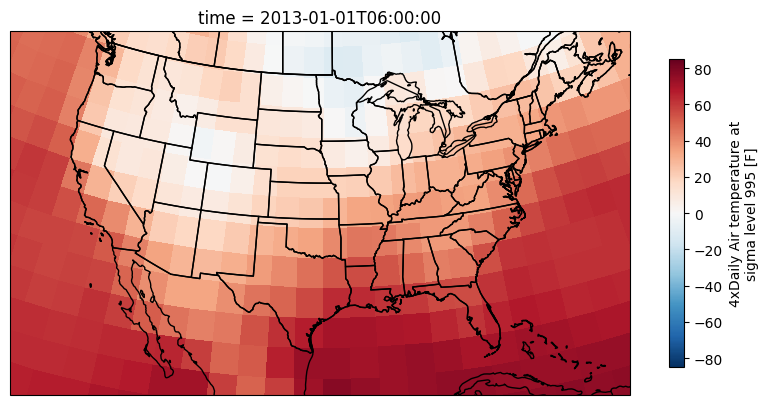

In [10]:
ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

ax.set_extent([-123, -70, 20, 50])

air = ds['Tair'].isel(time=1)

# very numpy-like!
air = (air - 273.15) * (9/5) + 32

#remember to update the metadata!
air.attrs['units'] = "F"

air.plot(transform=ccrs.PlateCarree(),
         cbar_kwargs={'shrink': 0.4},
         ax=ax)

### Chapter 7.4.4 - Masking

In some cases, you may want to discount or disqualify certain pixels in time and space when they are below a certain threshold. We can do this using the `.where` method.

The `where` method of a DataArray can be used to assign `np.nan` (no value, null, etc.) to pixels that fail a given test (similar to `pandas`!).

The basic pattern for this method is to pass in a test that includes the DataArray. In this example `da` is a DataArray, and `da > threshold` is an example test (the test could be anything).

`result = da.where(da > threshold)`

Below, I provide a slightly different approach compared to the last example.

First, I set `air` equal to a DataArray

In [11]:
air = ds['Tair']

Next I run the masking method to mask all pixels below zero

*Think about*: Where and when is the masking being applied?

In [12]:
air_ab_frz = air.where(air > 273.15)

And now convert the data to `F` and change the metadata on the masked DataArray:

In [13]:
air_ab_frz = (air_ab_frz - 273.15) * (9/5) + 32
air_ab_frz.attrs['units'] = "F"


**Your Turn**: change the number in `air_eg = air.isel(time=5)` to `6` or other integers. How can you tell that the `where` was applied to all time steps?

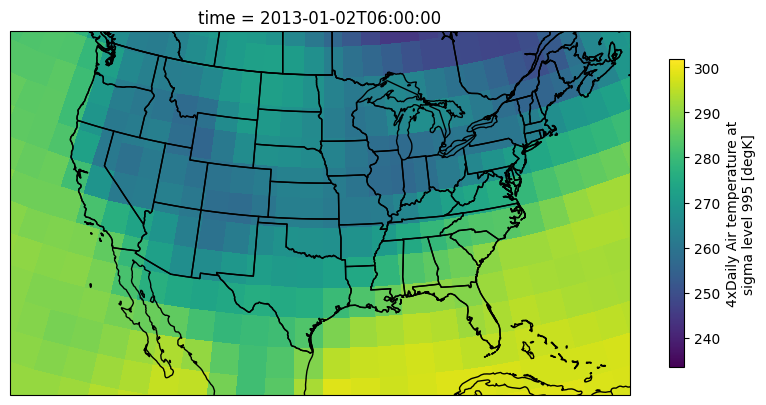

In [14]:
ax = plt.subplot(1, 1, 1, projection=ccrs.LambertConformal())
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.COASTLINE)

ax.set_extent([-123, -70, 20, 50])

air_eg = air.isel(time=5)

air_eg.plot(transform=ccrs.PlateCarree(),
         cbar_kwargs={'shrink': 0.4},
         ax=ax)

**Your Turn**: Get into small groups and write code that allows you to examine temperature change between two subsequent `time` steps.

#### Built-in math functions

`xarray`’s most useful methods include [simple mathematical operations](https://tutorial.xarray.dev/fundamentals/03.1_computation_with_xarray.html) that we have used before with numpy: mean, sum, max, min, std, percentile/quantile. We can take advantage of the coordinates to transform our Geoscience expectations and best practices into simple method calls.

We will practice these method calls in [Lab 4](https://ahaberlie.github.io/python_programming_geosciences/l4-first-last/).